# ensemble methods

## Conditions for ensembles to outperform base models

For an ensemble method to perform better than a base classifier, it must meet these two criteria:

1. **Accuracy:** the combination of base classifiers must outperform random guessing. 
2. **Diversity:** base models must not be identical in classification/regression estimates.
  

## Bagging

The ensemble method we will be using today is called **bagging**, which is short for **bootstrap aggregating**.

Bagging builds multiple base models with **resampled training data with replacement.** We train $k$ base classifiers on $k$ different samples of training data. Using random subsets of the data to train base models promotes more differences between the base models.

Random Forests, which "bag" decision trees, can achieve very high classification accuracy.



## Bagging's magic decrease of model variance 

One of the biggest advantages of Random Forests is that they **decrease variance without increasing bias**. Essentially you can get a better model without having to trade off between bias and variance.

---

**VARIANCE DECREASE**

Base model estimates are averaged together, so variability of model predictions (across hypothetical samples) is lower.

---

**NO/LITTLE BIAS INCREASE**

The bias remains the same as the bias of the individual base models. The model is still able to model the "true function" since the  base models' complexity is unrestricted (low bias).


### 1. Implementing a bagging classifier

We can, for instance, build an ensemble from a collection of 10 DT classifiers as follows:

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
import pandas as pd

In [3]:
#crateting bagging 
bag_dt = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=10, max_samples=.50, random_state=3)

In [47]:
from sklearn.datasets import load_breast_cancer

In [48]:

#load and explore dataset
dataset = load_breast_cancer()
#print(dataset)
dataset.feature_names


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [21]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [23]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [24]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [25]:
dataset.DESCR

'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 is Mean Rad

In [49]:
#Create X and y
X= dataset.data
y= dataset.target

In [50]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [51]:
#split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=3)

In [52]:
#train the model
bag_dt.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=3, verbose=0, warm_start=False)

In [53]:
#test score
print(bag_dt.score(X_test, y_test))

0.9300699300699301


In [55]:
#or can do
y_pred=bag_dt.predict(X_test)

In [56]:
#now check score
bag_dt.score(X_test, y_pred)

1.0

In [57]:
#train single dt and compare score
tree.DecisionTreeClassifier(random_state=3).fit(X_train,y_train).score(X_test, y_test)

0.9230769230769231

it is less than the bagging of 10 DT estimators

## 2. Implementing same with KNN classifier
We can, for instance, build an ensemble from a collection of 10 KNN classifiers as follows:

In [38]:

from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), n_estimators=10)

The BaggingClassifier class provides a number of options to customize the ensemble:
- n_estimators: As shown in the preceding code, this specifies the number of base estimators in the ensemble.
- max_samples: This denotes the number (or fraction) of samples to draw from the dataset to train each base estimator. We can set bootstrap=True to sample with replacement (effectively implementing bagging), or we can set bootstrap=False to implement pasting.
- max_features: This denotes the number (or fraction) of features to draw from the feature matrix to train each base estimator. We can set `max_samples`$=1.0$ and `max_features`$<1.0$ to implement the random subspace method. Alternatively, we can set both `max_samples`$<1.0$ and `max_features`$<1.0$ to implement the random patches method.

For example, if we wanted to implement bagging with 10  k -NN classifiers with  k=5 , where every  k -NN classifier is trained on 50% of the samples in the dataset, we would modify the preceding command as follows:

In [39]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=True, random_state=3) 

###### We are using the same above dataset and splits

In [58]:
bag_knn.fit(X_train, y_train)
bag_knn.score(X_test, y_test)

0.9370629370629371

The performance boost will become evident once we also train a single  k -NN classifier on the data: Even it is more than DT bagging

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.916083916083916

Without changing the underlying algorithm, we were able to improve our test score from
91.6% to 93.7% by simply letting 10 k-NN classifiers do the job instead of a single one.

You're welcome to experiment with other bagging ensembles.

For example, in order to change the above code to implement the random patches method, add `max_features=xxx` to the `BaggingClassifier` call in `In [2]`, where `xxx` is a number or fraction of features you want each base estimator to train on.

In [60]:
#can also check score on predicted data
y_pred=knn.predict(X_test)

In [61]:
knn.score(X_test, y_pred)

1.0

## 3. Implementing a bagging regressor

Similarly, we can use the BaggingRegressor class to form an ensemble of regressors:

In [66]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bag_tree = BaggingRegressor(DecisionTreeRegressor(),
                           max_features=0.5, max_samples=.5, n_estimators=10, 
                           random_state=3)

In [67]:
from sklearn.datasets import load_boston
dataset = load_boston()
X = dataset.data
y = dataset.target

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [69]:
bag_tree.fit(X_train, y_train)
bag_tree.score(X_test, y_test)

0.8210208439772335

In [71]:
tree.DecisionTreeRegressor(random_state=3).fit(X_train,y_train).score(X_test, y_test)

0.8082254209676387

We can compare the prediction score 

# Implementing a random forest with scikit-learn

In [16]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt


# Instructions
'''
- Fit both clf and clf2 to the data.
- Use train[columns] as the predictors, and train["high_income"] as the target.
- Make predictions on the test set predictors (test[columns]) using both clf and clf2.
- For both sets of predictions, compute the AUC between the predictions and the actual values (test["high_income"]) 
   using the roc_auc_score function.
- Use the print function to display the AUC values for both.
'''

In [3]:
df = pd.read_csv("./data/Carseats.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### Preprocessing Data

In [8]:
#checking nan
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [9]:
#checking type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


Three Object Field in that

In [73]:
#make copy of the original farme to retain original frame
df1 = df.copy()

In [65]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


#### EDA

In [7]:
df.ShelveLoc.unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BEEA3C8>,
      dtype=object)

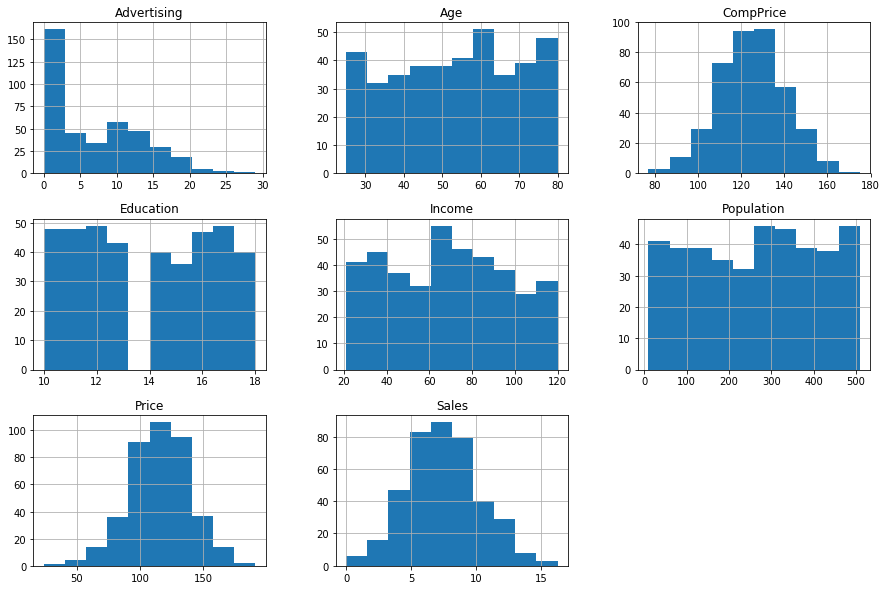

In [22]:
df.hist(figsize=(15, 10))

Ploting Sales

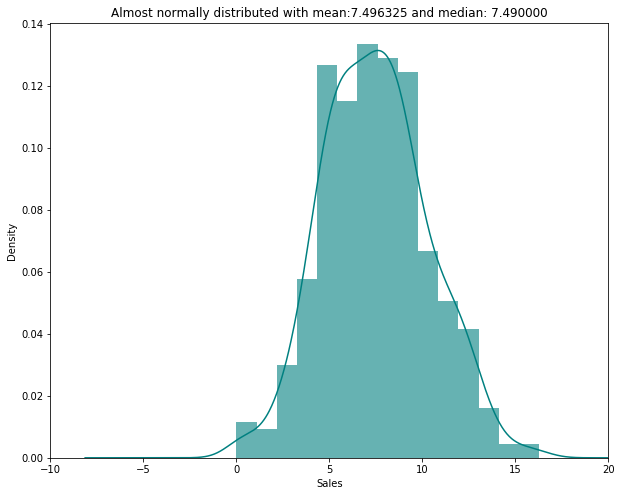

In [44]:
plt.figure(figsize=(10,8))
ax = df1["Sales"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df1["Sales"].plot(kind='Density', color='teal')
ax.set(xlabel='Sales')
plt.xlim(-10,20) # as in describe minimum is 0 and maximum is 17(approx)

plt.title("Almost normally distributed with mean:%f and median: %f" % (df1['Sales'].mean(), df1['Sales'].median()))
plt.show()

Obsservation: We can categories sales in 0 and 1, above mean would be 1

In [53]:
#converting sales to 0 and 1
df1['Sales'].mask(df1['Sales']<= 7.5, other=0, inplace=True)
df1['Sales'].mask(df1['Sales']> 7.5, 1, inplace=True)


In [74]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [75]:
#or we can apply lambda function for the same
df1['High_sales'] = df.Sales.map(lambda x: 1 if x>7.5 else 0)

In [78]:
df1.Urban.unique(), df1.US.unique()

(array(['Yes', 'No'], dtype=object), array(['Yes', 'No'], dtype=object))

In [79]:
#converting categorical varibale
#can convert through getdummies/ label encoder or many others
#we are using here factorize and map
df1.ShelveLoc = pd.factorize(df1.ShelveLoc)[0]
df1.Urban = df1.Urban.map(lambda x: 1 if x=='Yes' else 0)
df1.US = df1.US.map(lambda x: 1 if x=='Yes' else 0)
df1.info()  # observing ---there is no categorical variable now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null int64
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null int64
US             400 non-null int64
High_sales     400 non-null int64
dtypes: float64(1), int64(11)
memory usage: 37.6 KB


In [81]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High_sales
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [83]:
#get predictor and target into seprate frames
X = df1.drop(['Sales', 'High_sales'], axis=1)
y = df1.High_sales

In [88]:
#Split data into tarining and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.7, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [91]:
#Shape of all splits
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((280, 10), (120, 10), (280,), (120,))

In [97]:
#training models
clf = DecisionTreeClassifier(random_state=1, min_samples_leaf=2)
clf.fit(X_train, y_train)

clf2 = DecisionTreeClassifier(random_state=1, max_depth=5)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(roc_auc_score(y_test, y_pred))

y_pred1 = clf2.predict(X_test)
print(roc_auc_score(y_test, y_pred1))

# even we can find best regresser using grid search as before

0.6930803571428572
0.7020089285714286


In [117]:
#applying majority voting
major=[]
for i in zip(y_pred,y_pred1):
     major.append(max(i))
y_new=np.array(major)

#apply again roc_auc_score
print(roc_auc_score(y_test, y_new))  

0.7020089285714286


**observation:** which is not affacting more 

In [118]:
#hence we can use another way of calculating the cumulative predction of several predictors
pred_prob = clf.predict_proba(X_test)[:,1]
pred_prob1 = clf2.predict_proba(X_test)[:,1]
combined_prob = (pred_prob + pred_prob1) / 2
rounded_prob = np.round(combined_prob)

print(roc_auc_score(y_test, rounded_prob))

0.7131696428571428


**observation:** which is emproving it , it is another way of proving that ensembling is working towards improving the performance rather the single 

We made only two DT on the above example we can achieve it by using  Random Forest also in  more improved manner

**class sklearn.ensemble.RandomForestClassifier(n_estimators=’warn’, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)**


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [119]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor

# we can achieve the above two tasks using the following codes
# Bagging: using all features
rfc1 = RandomForestClassifier(max_features=10, random_state=1)
rfc1.fit(X_train, y_train)
pred1 = rfc1.predict(X_test)
print(roc_auc_score(y_test, pred1))

0.7756696428571429


**observation:** Which is much more improved score

### Usage of Bagging in random forest 

In [120]:

# Bagging: using all features
rfc1 = RandomForestClassifier(max_features=10, random_state=1)
bag_rdt = BaggingClassifier(rfc1, n_estimators=10, max_samples=.50, random_state=3)

bag_rdt.fit(X_train, y_train)
pred1 = bag_rdt.predict(X_test)
print(roc_auc_score(y_test, pred1))



0.8058035714285715


**observation:** Which is much more improved score

In [122]:
# Bagging: using some features-- auto features adjustment
rfc1 = RandomForestClassifier(max_features=7, random_state=1)
bag_rdt = BaggingClassifier(rfc1, n_estimators=10, max_samples=.50, random_state=3)

bag_rdt.fit(X_train, y_train)
pred1 = bag_rdt.predict(X_test)
print(roc_auc_score(y_test, pred1))


0.7734375


 Similarly, we can apply  BaggingRegressor, RandomForestRegressor,

The random forest algorithm is incredibly powerful, but isn't applicable to all tasks. The main strengths of a random forest are:

**Accurate predictions** -- Random forests achieve near state of the art performance on many machine learning tasks. Along with neural networks and gradient boosted trees, they are typically one of the top performing algorithms. Resistance to overfitting -- due to how they're constructed, random forests are fairly resistant to overfitting. Parameters like max_depth still have to be set and tweaked, though.

**weaknesses** --- Hard to interpret 

-- because we've averaging the results of many trees, it can be hard to figure out why a random forest is making predictions the way it is. Longer creation time -- making two trees takes twice as long as making one, 3 takes three times as long, and so on. Luckily, we can exploit multicore processors to parallelize tree construction.

**Observation of the tradeoff**

it makes sense to use random forests in situations where accuracy is of the utmost importance, and being able to interpret or explain the decisions the model is making isn't key. In cases where time is of the essence, or interpretability is important, a single decision tree may be a better choice.
